In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import lalsimulation as lal

In [3]:
#samples of length 1284
gam1 = np.loadtxt("gamma1.dat.txt", dtype=float)
gam2 = np.loadtxt("gamma2.dat.txt", dtype=float)
gam3 = np.loadtxt("gamma3.dat.txt", dtype=float)
logp1_cgs = np.loadtxt("logp1.dat.txt", dtype=float)

In [4]:
#log(p1) ∈ [33.6,35.4]
#Γ1 ∈ [2.0, 4.5]
#Γ2 , Γ3 ∈ [1.1, 4.5]

In [5]:
#Ba is CGS, while Pa is SI
# 1Ba = 0.1Pa

In [37]:
#convert logp1 to si units
logp1_si = logp1_cgs - 1

# Single Line

In [32]:
#assign vals for single EOS
num = 2
gam1trail = gam1[num]
gam2trail = gam2[num]
gam3trail = gam3[num]
logp_1trial = logp1_cgs[num]

In [33]:
actEOS = lal.SimNeutronStarEOS4ParameterPiecewisePolytrope(logp_1trial, gam1trail, gam2trail, gam3trail) 

In [34]:
act_hmin = 0.01
act_hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(actEOS)

act_loghmin = np.log10(act_hmin)
act_loghmax = np.log10(act_hmax)

act_h_array = np.linspace(act_loghmin,act_loghmax,100)

act_density = []
act_pressure = []

for h in act_h_array:
    act_density.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(10**h,actEOS))
    act_pressure.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(10**h,actEOS))
    
    
act_density = np.array(act_density)
act_pressure = np.array(act_pressure)

#cgs units
act_density_cgs = act_density * 1e-3
act_pressure_cgs = act_pressure * 10

act_logdensity = np.log10(act_density_cgs)
act_logpressure = np.log10(act_pressure_cgs)

Text(0, 0.5, 'pressure')

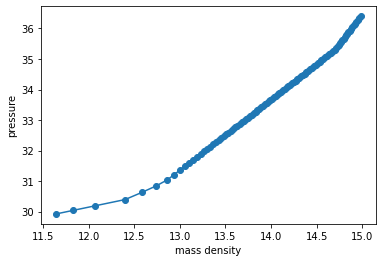

In [35]:
plt.plot(act_logdensity,act_logpressure,marker = 'o')
plt.xlabel("mass density")
plt.ylabel("pressure")
#plt.xlim([14,15.4])
#plt.ylim([32,37])

# Many Lines

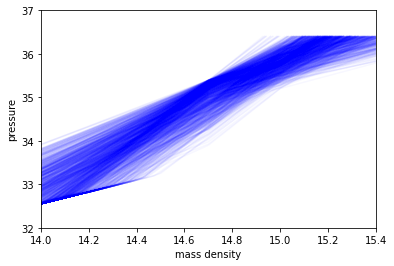

In [47]:
count = 0

for i in range(1284):  #for i in range(1284)
    
    knownlogp_1 = float(logp1_si[i])
    knowngam1 = float(gam1[i])
    knowngam2 = float(gam2[i])
    knowngam3 = float(gam3[i])
        
    try: 
    
        #print(knownlogp_1,knowngam1,knowngam2,knowngam3)
    
        realEOS = lal.SimNeutronStarEOS4ParameterPiecewisePolytrope(knownlogp_1, knowngam1, knowngam2, knowngam3) 
    
        real_h = np.linspace(0.0001,lal.SimNeutronStarEOSMaxPseudoEnthalpy(realEOS),1000)
    
        real_hmin = 0.0001
        real_hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(realEOS)
    
        real_loghmin = np.log10(real_hmin)
        real_loghmax = np.log10(real_hmax)

        real_rho = []
        real_p = []

        for k in range(len(real_h)):
            real_rho.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(real_h[k],realEOS)*.001)
            real_p.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(real_h[k],realEOS)*10)
            
        real_rho = np.array(real_rho)
        real_p = np.array(real_p)

        plt.plot(np.log10(real_rho),np.log10(real_p),alpha=0.03,color='blue')
        
        plt.xlabel("mass density")
        plt.ylabel("pressure")
        count += 1
        
    except:
        print(knownlogp_1,knowngam1,knowngam2,knowngam3)
        print(count, "no good")
        count += 1
    
plt.xlim([14,15.4])
plt.ylim([32,37])
plt.show()